# Author - Shreya Jallypally

## Introduction

* We will be using the Iris data set for these exercises
* Load data
* Explore the data

In [5]:
import pandas as pd
import numpy as np
import os

data=pd.read_csv('C:\IntelPython3\projects\Iris_Data.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Observe the classes in the target variable.

In [8]:
data['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

## Plot the data to see the correlation among features

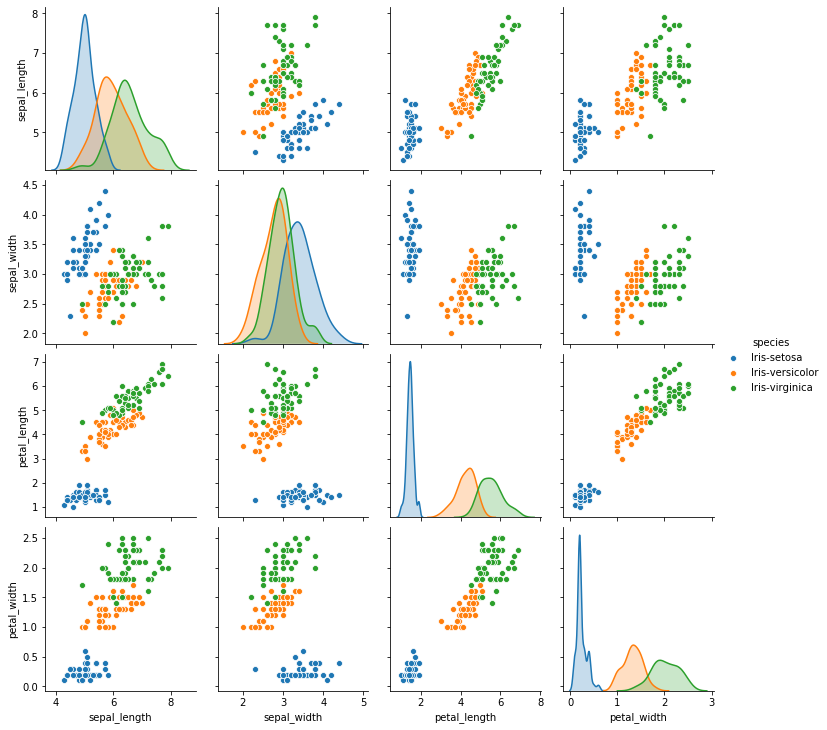

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.pairplot(data,hue='species')

In [10]:
data.corr().abs()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.109369,0.871754,0.817954
sepal_width,0.109369,1.000000,0.420516,0.356544
petal_length,0.871754,0.420516,1.000000,0.962757
petal_width,0.817954,0.356544,0.962757,1.000000


## Check if there the data is skewed, If there is then apply the transformation 

In [11]:
skew_columns = (data
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns


Series([], dtype: float64)

* Fit a K-means clustering model with two clusters.
* check the inertia and number of clusters with the estimator.

In [12]:
from sklearn.cluster import KMeans
X=[i for i in data.columns if i!='species']
X=data[X]
y=data['species']

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
X['kmeans']=kmeans.predict(X)
X

,sepal_length,sepal_width,petal_length,petal_width,kmeans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [212]:
numclus,inertia=[],[]
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    numclus.append(i),inertia.append(kmeans.inertia_)


* Now plot the stored data of clusters and inertia and see how clusters quantity effects inertia

[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'number of clusters')]

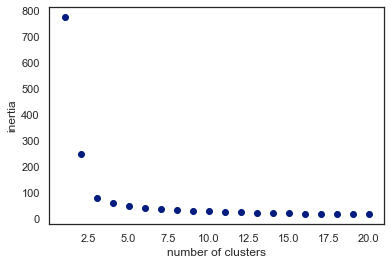

In [213]:
a=plt.axes()
a.scatter(numclus,inertia)
a.set(xLabel='number of clusters',yLabel='inertia')

* Scale the features inorder to get accurate classification results.

In [214]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cols=[i for i in X.columns if i!='kmeans']
Xcols=X[cols]
Xsc=sc.fit_transform(Xcols)
Xksc=pd.DataFrame(Xsc,columns=Xcols.columns)
Xksc=pd.concat([Xksc,X['kmeans']],axis=1)

## Let's apply kmeans with Random forest
* As it's showing high roc_auc score than aglomerative and logistic algorithms

In [217]:

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test.values)
        roc_auc_list.append(roc_auc_score(y_test, y_scored,multi_class='ovr'))
    return np.mean(roc_auc_list)
    return classification_report(y_test, y_predicted)


estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, Xksc, y)

roc_with_kmeans

0.9959999999999999

## Also check with Logistic regression and check the accuracy, Use the estimator which gives highest accuracy 

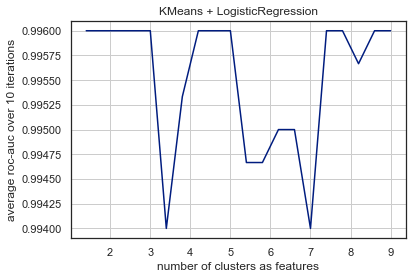

In [209]:
from sklearn.linear_model import LogisticRegression

sss = StratifiedShuffleSplit(n_splits=10, random_state=42)


def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(Xksc)
    km_col = pd.Series(km.predict(Xksc))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
 
    return pd.concat([Xksc, km_cols], axis=1)


estimatori = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]


# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='number of clusters as features',
    ylabel='average roc-auc over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)

In [210]:
np.mean(roc_auc_list)

0.9955166666666664

## Now let's visualize the clusters and their centers with kmeans below.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'sepal_width'),
 Text(0.5, 0, 'sepal_length'),
 Text(0.5, 1.0, 'Clusters')]

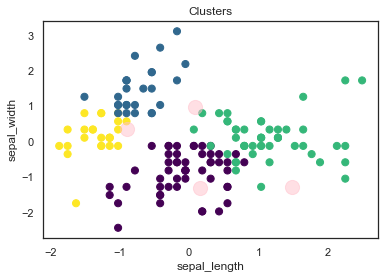

In [202]:
km = KMeans(n_clusters=4)
km.fit(Xksc)
km_col = pd.Series(km.predict(Xksc))
km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
plt.scatter(Xksc['sepal_length'], Xksc['sepal_width'], c=km_col, s=50, cmap='viridis')
a=plt.axes()
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='pink', s=200, alpha=0.5);
a.set(xLabel='sepal_length',yLabel='sepal_width',title='Clusters')